In [97]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # For 3D plotting

In [98]:
def RotX(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[1, 1] = ct
    R[1, 2] = -st
    R[2, 1] = st
    R[2, 2] = ct
    return R

def RotY(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[0, 0] = ct
    R[0, 2] = st
    R[2, 0] = -st
    R[2, 2] = ct
    return R

def RotZ(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[0, 0] = ct
    R[0, 1] = -st
    R[1, 0] = st
    R[1, 1] = ct
    return R

In [99]:
def transform_point(pb, R, p = np.zeros((3, 1))):
    return p + R @ pb

def transform_vector(vb, R):
    return R @ vb

def homogeneous(R, p = np.zeros((3, 1))):
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3:] = p

    return T

In [100]:
pb = np.array([[0.1, 0.2, -0.1]]).T

R = RotX(np.pi / 2.)
pc = np.array([[2., 0., 0.]]).T

T = homogeneous(R, pc)

pbh = np.vstack([pb, 1.])
vbh = np.vstack([pb, 0.])

pw1 = transform_point(pb, R, pc)
pw2 = T @ pbh

print(pw1.T)
print(pw2.T)

vw1 = transform_vector(pb, R)
vw2 = T @ vbh

print(vw1.T)
print(vw2.T)

[[2.1 0.1 0.2]]
[[2.1 0.1 0.2 1. ]]
[[0.1 0.1 0.2]]
[[0.1 0.1 0.2 0. ]]


In [101]:
def rot_inv(R):
    return R.T

def hom_inv(T):
    R = T[:3, :3]
    t = T[:3, 3:]

    Tn = np.eye(4)
    Tn[:3, :3] = R.T
    Tn[:3, 3:] = -R.T @ t

    return Tn

In [102]:
R = RotY(np.pi / 4.)
pc = np.array([[0.5, 0., 0.]]).T

T = homogeneous(R, pc)

print(rot_inv(R))
print(hom_inv(T)[:3, :3])

print(np.linalg.inv(R))

print(hom_inv(T))
print(np.linalg.inv(T))

[[ 0.707  0.    -0.707]
 [ 0.     1.     0.   ]
 [ 0.707  0.     0.707]]
[[ 0.707  0.    -0.707]
 [ 0.     1.     0.   ]
 [ 0.707  0.     0.707]]
[[ 0.707  0.    -0.707]
 [ 0.     1.     0.   ]
 [ 0.707  0.     0.707]]
[[ 0.707  0.    -0.707 -0.354]
 [ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.707 -0.354]
 [ 0.     0.     0.     1.   ]]
[[ 0.707  0.    -0.707 -0.354]
 [ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.707 -0.354]
 [ 0.     0.     0.     1.   ]]


In [103]:
def transform_point_homogeneous(T, pb):
    return (T @ np.vstack([pb, 1.]))[:3, :]

def transform_vector_homogeneous(T, vb):
    return (T @ np.vstack([vb, 0.]))[:3, :]

pb = np.array([[0.5, 0.2, -0.1]]).T

pw = transform_point_homogeneous(T, pb)

pbn = transform_point_homogeneous(hom_inv(T), pw)

print(pb.T)
print(pbn.T)
print(pw.T)

[[ 0.5  0.2 -0.1]]
[[ 0.5  0.2 -0.1]]
[[ 0.783  0.2   -0.424]]


In [104]:
pb = np.array([[0.5, 0.2, -0.1]]).T

pw = R @ pb
pbn = rot_inv(R) @ pw

print(pb.T)
print(pbn.T)
print(pw.T)

[[ 0.5  0.2 -0.1]]
[[ 0.5  0.2 -0.1]]
[[ 0.283  0.2   -0.424]]


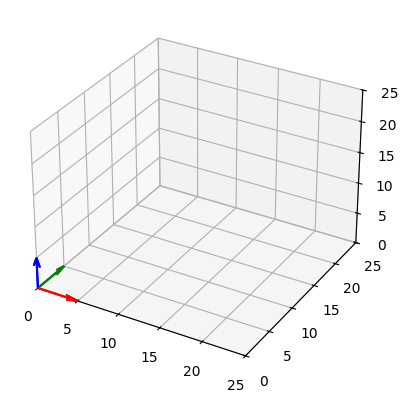

In [105]:
# Plot the original and transformed trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot_frame(ax, T):
    origin = T[:3, 3:]
    R = T[:3, :3]
    xaxis = R @ np.array([[1., 0., 0.]]).T
    yaxis = R @ np.array([[0., 1., 0.]]).T
    zaxis = R @ np.array([[0., 0., 1.]]).T

    ax.quiver(*origin, *xaxis, color='r', length=5)
    ax.quiver(*origin, *yaxis, color='g', length=5)
    ax.quiver(*origin, *zaxis, color='b', length=5)

def plot_frame2(ax, T):
    origin = T[:3, 3]
    x_axis = T[:3, 0]
    y_axis = T[:3, 1]
    z_axis = T[:3, 2]

    x_axis = x_axis / np.linalg.norm(x_axis)
    y_axis = y_axis / np.linalg.norm(y_axis)
    z_axis = z_axis / np.linalg.norm(z_axis)

    ax.quiver(*origin, *x_axis, color='r', length=5, normalize=True)
    ax.quiver(*origin, *y_axis, color='g', length=5, normalize=True)
    ax.quiver(*origin, *z_axis, color='b', length=5, normalize=True)

T = np.eye(4)
plot_frame(ax, T)
plot_frame2(ax, T)

ax.set_xlim([0., 25.])
ax.set_ylim([0., 25.])
ax.set_zlim([0., 25.])

plt.show()

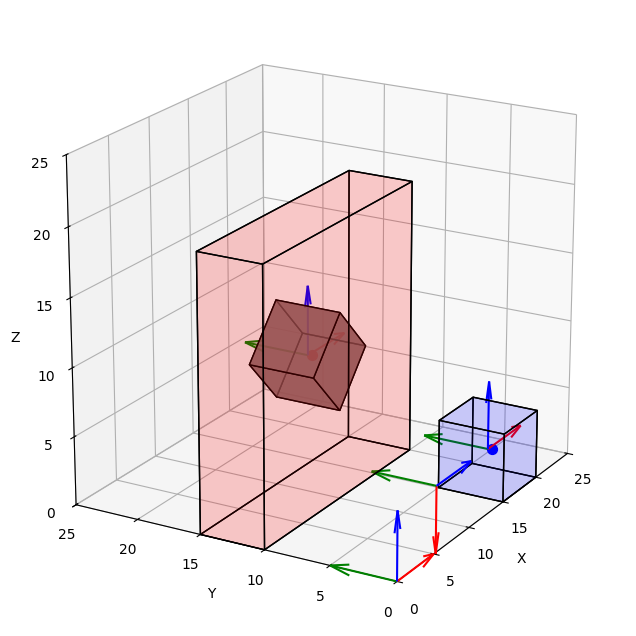

In [106]:
# Υποθέτουμε ότι οι imports (numpy as np, matplotlib.pyplot as plt,
# Poly3DCollection) και οι ορισμοί των βοηθητικών συναρτήσεων
# (homogeneous, RotZ, RotX, RotY, plot_frame,
# plot_through_hole, transform_point_homogeneous) έχουν γίνει.

# --- Ορισμός Frames Αντικειμένων ---

# Tbody1: Frame για το μπλε κουτί (κέντρο)
Tbody1 = homogeneous(RotZ(0), np.array([[17.5, 2.5, 2.5]]).T)


# === ΑΛΛΑΓΗ ===
# Tbody2: Frame στο κέντρο του κόκκινου κουτιού (ΔΕΝ περιστρέφεται)
# Αυτό το frame θα σχεδιαστεί.
Tbody2_translation = np.array([[10., 12.5, 10]]).T
Tbody2 = homogeneous(RotY(0), Tbody2_translation) # Μηδενική περιστροφή

# T_rhombus: Ένας ξεχωριστός, "αόρατος" πίνακας ΜΟΝΟ για τον ρόμβο,
# ο οποίος ΕΧΕΙ την περιστροφή 45 μοιρών.
T_rhombus = homogeneous(RotY(np.deg2rad(45)), Tbody2_translation)
# === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===


# --- Ρύθμιση 3D Γραφήματος ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Κόκκινο Αντικείμενο (Κουτί-Στόχος) ---
length_cm_r = 20  # x
width_cm_r = 5   # y
height_cm_r = 20  # z
box_translation_r = np.array([0, 10, 0])
vertices_r_local = np.array([
    [0, 0, 0], [length_cm_r, 0, 0], [length_cm_r, width_cm_r, 0], [0, width_cm_r, 0],
    [0, 0, height_cm_r], [length_cm_r, 0, height_cm_r],
    [length_cm_r, width_cm_r, height_cm_r], [0, width_cm_r, height_cm_r]
])
vertices_r_world = vertices_r_local + box_translation_r
faces_r = [
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[2], vertices_r_world[3]],
    [vertices_r_world[4], vertices_r_world[5], vertices_r_world[6], vertices_r_world[7]],
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[5], vertices_r_world[4]],
    [vertices_r_world[2], vertices_r_world[3], vertices_r_world[7], vertices_r_world[6]],
    [vertices_r_world[1], vertices_r_world[2], vertices_r_world[6], vertices_r_world[5]],
    [vertices_r_world[0], vertices_r_world[3], vertices_r_world[7], vertices_r_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_r, facecolors='r', linewidths=1, edgecolors='k', alpha = 0.1))

# --- Μπλε Αντικείμενο (Κύβος-Εργαλείο) ---
length_cm_b = 5
width_cm_b = 5
height_cm_b = 5
box_translation_b = np.array([15, 0, 0])
vertices_b_local = np.array([
    [0, 0, 0], [length_cm_b, 0, 0], [length_cm_b, width_cm_b, 0], [0, width_cm_b, 0],
    [0, 0, height_cm_b], [length_cm_b, 0, height_cm_b],
    [length_cm_b, width_cm_b, height_cm_b], [0, width_cm_b, height_cm_b]
])
vertices_b_world = vertices_b_local + box_translation_b
faces_b = [
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[2], vertices_b_world[3]],
    [vertices_b_world[4], vertices_b_world[5], vertices_b_world[6], vertices_b_world[7]],
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[5], vertices_b_world[4]],
    [vertices_b_world[2], vertices_b_world[3], vertices_b_world[7], vertices_b_world[6]],
    [vertices_b_world[1], vertices_b_world[2], vertices_b_world[6], vertices_b_world[5]],
    [vertices_b_world[0], vertices_b_world[3], vertices_b_world[7], vertices_b_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_b, facecolors='b', linewidths=1, edgecolors='k', alpha = 0.1))


# --- Ρόμβος (Περιστραμμένος Κύβος) ---
side_length_h = 5.0
h = side_length_h / 2.0
vertices_h_local = np.array([
    [-h, -h, -h], [h, -h, -h], [h, h, -h], [-h, h, -h],
    [-h, -h, h], [h, -h, h], [h, h, h], [-h, h, h]
])

vertices_h_world_list = []
for v_local in vertices_h_local:
    v_local_col = v_local.reshape(3, 1)

    # === ΑΛΛΑΓΗ ===
    # Χρησιμοποιούμε τον T_rhombus (τον περιστραμμένο) για να βρούμε
    # τις συντεταγμένες του ρόμβου.
    v_world = transform_point_homogeneous(T_rhombus, v_local_col)
    # === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===

    vertices_h_world_list.append(v_world.flatten())

vertices_h_world = np.array(vertices_h_world_list)
faces_h = [
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[2], vertices_h_world[3]],
    [vertices_h_world[4], vertices_h_world[5], vertices_h_world[6], vertices_h_world[7]],
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[5], vertices_h_world[4]],
    [vertices_h_world[2], vertices_h_world[3], vertices_h_world[7], vertices_h_world[6]],
    [vertices_h_world[1], vertices_h_world[2], vertices_h_world[6], vertices_h_world[5]],
    [vertices_h_world[0], vertices_h_world[3], vertices_h_world[7], vertices_h_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_h, facecolors=[0.5, 0.4, 0.4], linewidths=1, edgecolors='k', alpha=0.7))


# --- Σχεδίαση Frames ---
plot_frame(ax, np.eye(4)) # World Frame {S}
plot_frame(ax, Tbody1) # Frame Μπλε Κουτιού {B1}
# Σχεδιάζουμε το Tbody2, το οποίο τώρα πια ΔΕΝ έχει περιστροφή
plot_frame(ax, Tbody2) # Frame Κόκκινου Κουτιού {B2}

# --- Μετασχηματισμός Σημείου ---
pb = np.array([[0.2, -0.2, 0.]]).T
pw = transform_point_homogeneous(Tbody1, pb)
ax.scatter(pw[0, 0], pw[1, 0], pw[2, 0], c='b', s=50, label='pb xform from Blue')

# Αυτό το σημείο θα σχεδιαστεί σε σχέση με το Tbody2 (το μη-περιστραμμένο)
pw2 = transform_point_homogeneous(Tbody2, pb)
ax.scatter(pw2[0, 0], pw2[1, 0], pw2[2, 0], c='r', s=50, label='pb xform from Red')

pendef = np.array([[10, 2.5, 2.5]]).T
Rendef = RotX(np.deg2rad(90)) @ RotY(np.deg2rad(90)) @ RotZ(np.deg2rad(-90))
Tendef = homogeneous(Rendef, pendef)
plot_frame(ax, Tendef)

ax.set_xlim([0,25])
ax.set_ylim([0,25])
ax.set_zlim([0,25])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=-150)
plt.savefig('my_plot.png')
plt.show()

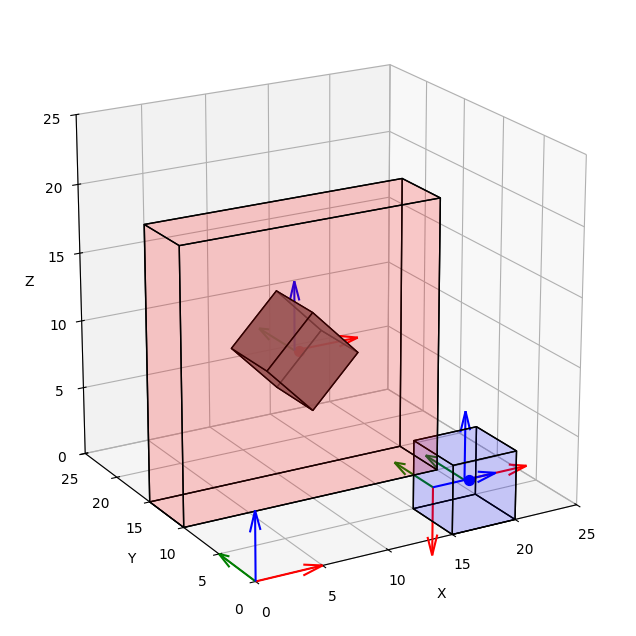

In [112]:
# Υποθέτουμε ότι οι imports (numpy as np, matplotlib.pyplot as plt,
# Poly3DCollection) και οι ορισμοί των βοηθητικών συναρτήσεων
# (homogeneous, RotZ, RotX, RotY, plot_frame,
# plot_through_hole, transform_point_homogeneous) έχουν γίνει.

# --- Ορισμός Frames Αντικειμένων ---

# Tbody1: Frame για το μπλε κουτί (κέντρο)
Tbody1 = homogeneous(RotZ(0), np.array([[17.5, 2.5, 2.5]]).T)


# === ΑΛΛΑΓΗ ===
# Tbody2: Frame στο κέντρο του κόκκινου κουτιού (ΔΕΝ περιστρέφεται)
# Αυτό το frame θα σχεδιαστεί.
Tbody2_translation = np.array([[10., 12.5, 10]]).T
Tbody2 = homogeneous(RotY(0), Tbody2_translation) # Μηδενική περιστροφή

# T_rhombus: Ένας ξεχωριστός, "αόρατος" πίνακας ΜΟΝΟ για τον ρόμβο,
# ο οποίος ΕΧΕΙ την περιστροφή 45 μοιρών.
T_rhombus = homogeneous(RotY(np.deg2rad(45)), Tbody2_translation)
# === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===


# --- Ρύθμιση 3D Γραφήματος ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Κόκκινο Αντικείμενο (Κουτί-Στόχος) ---
length_cm_r = 20  # x
width_cm_r = 5   # y
height_cm_r = 20  # z
box_translation_r = np.array([0, 10, 0])
vertices_r_local = np.array([
    [0, 0, 0], [length_cm_r, 0, 0], [length_cm_r, width_cm_r, 0], [0, width_cm_r, 0],
    [0, 0, height_cm_r], [length_cm_r, 0, height_cm_r],
    [length_cm_r, width_cm_r, height_cm_r], [0, width_cm_r, height_cm_r]
])
vertices_r_world = vertices_r_local + box_translation_r
faces_r = [
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[2], vertices_r_world[3]],
    [vertices_r_world[4], vertices_r_world[5], vertices_r_world[6], vertices_r_world[7]],
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[5], vertices_r_world[4]],
    [vertices_r_world[2], vertices_r_world[3], vertices_r_world[7], vertices_r_world[6]],
    [vertices_r_world[1], vertices_r_world[2], vertices_r_world[6], vertices_r_world[5]],
    [vertices_r_world[0], vertices_r_world[3], vertices_r_world[7], vertices_r_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_r, facecolors='r', linewidths=1, edgecolors='k', alpha = 0.1))

# --- Μπλε Αντικείμενο (Κύβος-Εργαλείο) ---
length_cm_b = 5
width_cm_b = 5
height_cm_b = 5
box_translation_b = np.array([15, 0, 0])
vertices_b_local = np.array([
    [0, 0, 0], [length_cm_b, 0, 0], [length_cm_b, width_cm_b, 0], [0, width_cm_b, 0],
    [0, 0, height_cm_b], [length_cm_b, 0, height_cm_b],
    [length_cm_b, width_cm_b, height_cm_b], [0, width_cm_b, height_cm_b]
])
vertices_b_world = vertices_b_local + box_translation_b
faces_b = [
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[2], vertices_b_world[3]],
    [vertices_b_world[4], vertices_b_world[5], vertices_b_world[6], vertices_b_world[7]],
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[5], vertices_b_world[4]],
    [vertices_b_world[2], vertices_b_world[3], vertices_b_world[7], vertices_b_world[6]],
    [vertices_b_world[1], vertices_b_world[2], vertices_b_world[6], vertices_b_world[5]],
    [vertices_b_world[0], vertices_b_world[3], vertices_b_world[7], vertices_b_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_b, facecolors='b', linewidths=1, edgecolors='k', alpha = 0.1))


# --- Ρόμβος (Περιστραμμένος Κύβος) ---
side_length_h = 5.0
h = side_length_h / 2.0
vertices_h_local = np.array([
    [-h, -h, -h], [h, -h, -h], [h, h, -h], [-h, h, -h],
    [-h, -h, h], [h, -h, h], [h, h, h], [-h, h, h]
])

vertices_h_world_list = []
for v_local in vertices_h_local:
    v_local_col = v_local.reshape(3, 1)

    # === ΑΛΛΑΓΗ ===
    # Χρησιμοποιούμε τον T_rhombus (τον περιστραμμένο) για να βρούμε
    # τις συντεταγμένες του ρόμβου.
    v_world = transform_point_homogeneous(T_rhombus, v_local_col)
    # === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===

    vertices_h_world_list.append(v_world.flatten())

vertices_h_world = np.array(vertices_h_world_list)
faces_h = [
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[2], vertices_h_world[3]],
    [vertices_h_world[4], vertices_h_world[5], vertices_h_world[6], vertices_h_world[7]],
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[5], vertices_h_world[4]],
    [vertices_h_world[2], vertices_h_world[3], vertices_h_world[7], vertices_h_world[6]],
    [vertices_h_world[1], vertices_h_world[2], vertices_h_world[6], vertices_h_world[5]],
    [vertices_h_world[0], vertices_h_world[3], vertices_h_world[7], vertices_h_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_h, facecolors=[0.5, 0.4, 0.4], linewidths=1, edgecolors='k', alpha=0.7))


# --- Σχεδίαση Frames ---
plot_frame(ax, np.eye(4)) # World Frame {S}
plot_frame(ax, Tbody1) # Frame Μπλε Κουτιού {B1}
# Σχεδιάζουμε το Tbody2, το οποίο τώρα πια ΔΕΝ έχει περιστροφή
plot_frame(ax, Tbody2) # Frame Κόκκινου Κουτιού {B2}

# --- Μετασχηματισμός Σημείου ---
pb = np.array([[0.2, -0.2, 0.]]).T
pw = transform_point_homogeneous(Tbody1, pb)
ax.scatter(pw[0, 0], pw[1, 0], pw[2, 0], c='b', s=50, label='pb xform from Blue')

# Αυτό το σημείο θα σχεδιαστεί σε σχέση με το Tbody2 (το μη-περιστραμμένο)
pw2 = transform_point_homogeneous(Tbody2, pb)
ax.scatter(pw2[0, 0], pw2[1, 0], pw2[2, 0], c='r', s=50, label='pb xform from Red')

pendef = np.array([[15, 2.5, 2.5]]).T
Rendef = RotX(np.deg2rad(90)) @ RotY(np.deg2rad(90)) @ RotZ(np.deg2rad(-90))
Tendef = homogeneous(Rendef, pendef)
plot_frame(ax, Tendef)

ax.set_xlim([0,25])
ax.set_ylim([0,25])
ax.set_zlim([0,25])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=-120)
plt.show()

--- Σχετικός Μετασχηματισμός T_EC (Στόχος ως προς End-Effector) ---
[[1. 0. 0. 0.]
 [0. 1. 0. 5.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


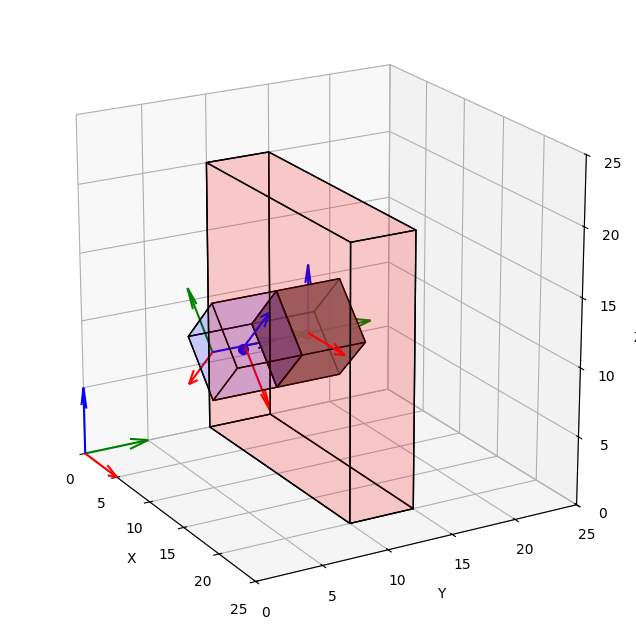

In [113]:
# --- Ορισμός Frames Αντικειμένων ---

# Tbody1: Frame για το μπλε κουτί (κέντρο)
# === ΑΛΛΑΓΗ: Τοποθέτηση μπλε κουτιού μπροστά στην τρύπα ===
Tbody1_translation = np.array([[10., 7.5, 10.]]).T # X=10, Z=10 (κέντρο τρύπας), Y=7.5 (ακριβώς έξω)
Tbody1_rotation = RotY(np.deg2rad(45)) # Ίδια περιστροφή με την τρύπα
Tbody1 = homogeneous(Tbody1_rotation, Tbody1_translation)
# === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===


# Tbody2: Frame στο κέντρο του κόκκινου κουτιού (ΔΕΝ περιστρέφεται)
Tbody2_translation = np.array([[10., 12.5, 10]]).T
Tbody2 = homogeneous(RotY(0), Tbody2_translation) # Μηδενική περιστροφή

# T_rhombus: Ένας ξεχωριστός, "αόρατος" πίνακας ΜΟΝΟ για τον ρόμβο,
# ο οποίος ΕΧΕΙ την περιστροφή 45 μοιρών.
T_rhombus = homogeneous(RotY(np.deg2rad(45)), Tbody2_translation)


# --- Ρύθμιση 3D Γραφήματος ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Κόκκινο Αντικείμενο (Κουτί-Στόχος) ---
length_cm_r = 20  # x
width_cm_r = 5   # y
height_cm_r = 20  # z
box_translation_r = np.array([0, 10, 0])
vertices_r_local = np.array([
    [0, 0, 0], [length_cm_r, 0, 0], [length_cm_r, width_cm_r, 0], [0, width_cm_r, 0],
    [0, 0, height_cm_r], [length_cm_r, 0, height_cm_r],
    [length_cm_r, width_cm_r, height_cm_r], [0, width_cm_r, height_cm_r]
])
vertices_r_world = vertices_r_local + box_translation_r
faces_r = [
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[2], vertices_r_world[3]],
    [vertices_r_world[4], vertices_r_world[5], vertices_r_world[6], vertices_r_world[7]],
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[5], vertices_r_world[4]],
    [vertices_r_world[2], vertices_r_world[3], vertices_r_world[7], vertices_r_world[6]],
    [vertices_r_world[1], vertices_r_world[2], vertices_r_world[6], vertices_r_world[5]],
    [vertices_r_world[0], vertices_r_world[3], vertices_r_world[7], vertices_r_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_r, facecolors='r', linewidths=1, edgecolors='k', alpha = 0.1))

# --- Μπλε Αντικείμενο (Κύβος-Εργαλείο) ---
# Ο ορισμός του (τοπικές κορυφές) παραμένει ο ίδιος
length_cm_b = 5
width_cm_b = 5
height_cm_b = 5
h_b = length_cm_b / 2.0 # Θα το κεντράρουμε στο 0,0,0 για ευκολία

# Ορίζουμε τις κορυφές τοπικά γύρω από το (0,0,0)
vertices_b_local = np.array([
    [-h_b, -h_b, -h_b], [h_b, -h_b, -h_b], [h_b, h_b, -h_b], [-h_b, h_b, -h_b],
    [-h_b, -h_b, h_b], [h_b, -h_b, h_b], [h_b, h_b, h_b], [-h_b, h_b, h_b]
])

# Μετασχηματίζουμε τις κορυφές του μπλε κουτιού με το Tbody1
vertices_b_world_list = []
for v_local in vertices_b_local:
    v_world = transform_point_homogeneous(Tbody1, v_local.reshape(3,1))
    vertices_b_world_list.append(v_world.flatten())
vertices_b_world = np.array(vertices_b_world_list)

# Ορίζουμε τις 6 όψεις
faces_b = [
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[2], vertices_b_world[3]],
    [vertices_b_world[4], vertices_b_world[5], vertices_b_world[6], vertices_b_world[7]],
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[5], vertices_b_world[4]],
    [vertices_b_world[2], vertices_b_world[3], vertices_b_world[7], vertices_b_world[6]],
    [vertices_b_world[1], vertices_b_world[2], vertices_b_world[6], vertices_b_world[5]],
    [vertices_b_world[0], vertices_b_world[3], vertices_b_world[7], vertices_b_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_b, facecolors='b', linewidths=1, edgecolors='k', alpha = 0.1))


# --- Ρόμβος (Περιστραμμένος Κύβος) ---
side_length_h = 5.0
h = side_length_h / 2.0
vertices_h_local = np.array([
    [-h, -h, -h], [h, -h, -h], [h, h, -h], [-h, h, -h],
    [-h, -h, h], [h, -h, h], [h, h, h], [-h, h, h]
])

vertices_h_world_list = []
for v_local in vertices_h_local:
    v_local_col = v_local.reshape(3, 1)
    # Χρησιμοποιούμε τον T_rhombus (τον περιστραμμένο)
    v_world = transform_point_homogeneous(T_rhombus, v_local_col)
    vertices_h_world_list.append(v_world.flatten())

vertices_h_world = np.array(vertices_h_world_list)
faces_h = [
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[2], vertices_h_world[3]],
    [vertices_h_world[4], vertices_h_world[5], vertices_h_world[6], vertices_h_world[7]],
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[5], vertices_h_world[4]],
    [vertices_h_world[2], vertices_h_world[3], vertices_h_world[7], vertices_h_world[6]],
    [vertices_h_world[1], vertices_h_world[2], vertices_h_world[6], vertices_h_world[5]],
    [vertices_h_world[0], vertices_h_world[3], vertices_h_world[7], vertices_h_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_h, facecolors=[0.5, 0.4, 0.4], linewidths=1, edgecolors='k', alpha=0.7))


# --- Σχεδίαση Frames ---
plot_frame(ax, np.eye(4)) # World Frame {S}
# Το Tbody1 θα είναι τώρα περιστραμμένο και μπροστά από την τρύπα
plot_frame(ax, Tbody1) # Frame Μπλε Κουτιού {B1}
plot_frame(ax, Tbody2) # Frame Κόκκινου Κουτιού {B2} (ευθυγραμμισμένο)

# --- Μετασχηματισμός Σημείου ---
pb = np.array([[0.2, -0.2, 0.]]).T
pw = transform_point_homogeneous(Tbody1, pb)
ax.scatter(pw[0, 0], pw[1, 0], pw[2, 0], c='b', s=50, label='pb xform from Blue')

pw2 = transform_point_homogeneous(Tbody2, pb)
ax.scatter(pw2[0, 0], pw2[1, 0], pw2[2, 0], c='r', s=50, label='pb xform from Red')

# T_SE: Η πόζα του End-Effector (μπλε κουτί) ως προς τον Κόσμο {S}
T_SE = Tbody1

# T_SC: Η πόζα του Cube (στόχος/ρόμβος) ως προς τον Κόσμο {S}
T_SC = T_rhombus

# T_ES: Ο αντίστροφος του T_SE. Περιγράφει τον Κόσμο {S} ως προς το {E}
T_ES = np.linalg.inv(T_SE)

# T_EC: Η πόζα του Cube {C} ως προς τον End-Effector {E}
# T_EC = T_ES @ T_SC
T_EC = np.dot(T_ES, T_SC) # Ίδιο με το @

# Εκτύπωση του αποτελέσματος
print("--- Σχετικός Μετασχηματισμός T_EC (Στόχος ως προς End-Effector) ---")
np.set_printoptions(precision=3, suppress=True) # Για πιο καθαρή εκτύπωση
print(T_EC)

#End Effector
pendef = np.array([[10., 5, 10.]]).T
Rendef = RotX(np.deg2rad(270)) @ RotY(np.deg2rad(0)) @ RotZ(np.deg2rad(135))
Tendef = homogeneous(Rendef, pendef)
plot_frame(ax, Tendef)

# --- Τελικές Ρυθμίσεις Γραφήματος ---
ax.set_xlim([0,25])
ax.set_ylim([0,25])
ax.set_zlim([0,25])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=-30)

plt.show()

--- Σχετικός Μετασχηματισμός T_EC (Στόχος ως προς End-Effector) ---
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


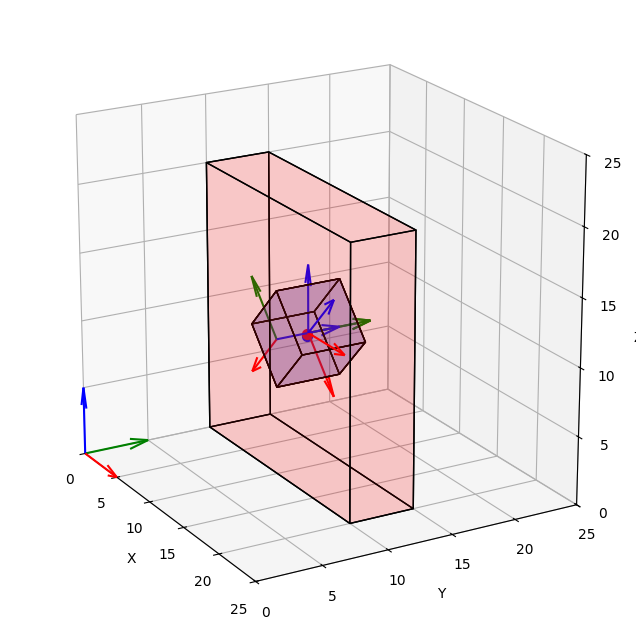

In [109]:
# Υποθέτουμε ότι οι imports (numpy as np, matplotlib.pyplot as plt,
# Poly3DCollection) και οι ορισμοί των βοηθητικών συναρτήσεων
# (homogeneous, RotZ, RotX, RotY, plot_frame,
# plot_through_hole, transform_point_homogeneous) έχουν γίνει.

# --- Ορισμός Frames Αντικειμένων ---

# Tbody1: Frame για το μπλε κουτί (κέντρο)
# === ΑΛΛΑΓΗ: Τοποθέτηση μπλε κουτιού μπροστά στην τρύπα ===
Tbody1_translation = np.array([[10., 12.5, 10.]]).T # X=10, Z=10 (κέντρο τρύπας), Y=7.5 (ακριβώς έξω)
Tbody1_rotation = RotY(np.deg2rad(45)) # Ίδια περιστροφή με την τρύπα
Tbody1 = homogeneous(Tbody1_rotation, Tbody1_translation)
# === ΤΕΛΟΣ ΑΛΛΑΓΗΣ ===


# Tbody2: Frame στο κέντρο του κόκκινου κουτιού (ΔΕΝ περιστρέφεται)
Tbody2_translation = np.array([[10., 12.5, 10]]).T
Tbody2 = homogeneous(RotY(0), Tbody2_translation) # Μηδενική περιστροφή

# T_rhombus: Ένας ξεχωριστός, "αόρατος" πίνακας ΜΟΝΟ για τον ρόμβο,
# ο οποίος ΕΧΕΙ την περιστροφή 45 μοιρών.
T_rhombus = homogeneous(RotY(np.deg2rad(45)), Tbody2_translation)


# --- Ρύθμιση 3D Γραφήματος ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Κόκκινο Αντικείμενο (Κουτί-Στόχος) ---
length_cm_r = 20  # x
width_cm_r = 5   # y
height_cm_r = 20  # z
box_translation_r = np.array([0, 10, 0])
vertices_r_local = np.array([
    [0, 0, 0], [length_cm_r, 0, 0], [length_cm_r, width_cm_r, 0], [0, width_cm_r, 0],
    [0, 0, height_cm_r], [length_cm_r, 0, height_cm_r],
    [length_cm_r, width_cm_r, height_cm_r], [0, width_cm_r, height_cm_r]
])
vertices_r_world = vertices_r_local + box_translation_r
faces_r = [
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[2], vertices_r_world[3]],
    [vertices_r_world[4], vertices_r_world[5], vertices_r_world[6], vertices_r_world[7]],
    [vertices_r_world[0], vertices_r_world[1], vertices_r_world[5], vertices_r_world[4]],
    [vertices_r_world[2], vertices_r_world[3], vertices_r_world[7], vertices_r_world[6]],
    [vertices_r_world[1], vertices_r_world[2], vertices_r_world[6], vertices_r_world[5]],
    [vertices_r_world[0], vertices_r_world[3], vertices_r_world[7], vertices_r_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_r, facecolors='r', linewidths=1, edgecolors='k', alpha = 0.1))

# --- Μπλε Αντικείμενο (Κύβος-Εργαλείο) ---
# Ο ορισμός του (τοπικές κορυφές) παραμένει ο ίδιος
length_cm_b = 5
width_cm_b = 5
height_cm_b = 5
h_b = length_cm_b / 2.0 # Θα το κεντράρουμε στο 0,0,0 για ευκολία

# Ορίζουμε τις κορυφές τοπικά γύρω από το (0,0,0)
vertices_b_local = np.array([
    [-h_b, -h_b, -h_b], [h_b, -h_b, -h_b], [h_b, h_b, -h_b], [-h_b, h_b, -h_b],
    [-h_b, -h_b, h_b], [h_b, -h_b, h_b], [h_b, h_b, h_b], [-h_b, h_b, h_b]
])

# Μετασχηματίζουμε τις κορυφές του μπλε κουτιού με το Tbody1
vertices_b_world_list = []
for v_local in vertices_b_local:
    v_world = transform_point_homogeneous(Tbody1, v_local.reshape(3,1))
    vertices_b_world_list.append(v_world.flatten())
vertices_b_world = np.array(vertices_b_world_list)

# Ορίζουμε τις 6 όψεις
faces_b = [
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[2], vertices_b_world[3]],
    [vertices_b_world[4], vertices_b_world[5], vertices_b_world[6], vertices_b_world[7]],
    [vertices_b_world[0], vertices_b_world[1], vertices_b_world[5], vertices_b_world[4]],
    [vertices_b_world[2], vertices_b_world[3], vertices_b_world[7], vertices_b_world[6]],
    [vertices_b_world[1], vertices_b_world[2], vertices_b_world[6], vertices_b_world[5]],
    [vertices_b_world[0], vertices_b_world[3], vertices_b_world[7], vertices_b_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_b, facecolors='b', linewidths=1, edgecolors='k', alpha = 0.1))


# --- Ρόμβος (Περιστραμμένος Κύβος) ---
side_length_h = 5.0
h = side_length_h / 2.0
vertices_h_local = np.array([
    [-h, -h, -h], [h, -h, -h], [h, h, -h], [-h, h, -h],
    [-h, -h, h], [h, -h, h], [h, h, h], [-h, h, h]
])

vertices_h_world_list = []
for v_local in vertices_h_local:
    v_local_col = v_local.reshape(3, 1)
    # Χρησιμοποιούμε τον T_rhombus (τον περιστραμμένο)
    v_world = transform_point_homogeneous(T_rhombus, v_local_col)
    vertices_h_world_list.append(v_world.flatten())

vertices_h_world = np.array(vertices_h_world_list)
faces_h = [
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[2], vertices_h_world[3]],
    [vertices_h_world[4], vertices_h_world[5], vertices_h_world[6], vertices_h_world[7]],
    [vertices_h_world[0], vertices_h_world[1], vertices_h_world[5], vertices_h_world[4]],
    [vertices_h_world[2], vertices_h_world[3], vertices_h_world[7], vertices_h_world[6]],
    [vertices_h_world[1], vertices_h_world[2], vertices_h_world[6], vertices_h_world[5]],
    [vertices_h_world[0], vertices_h_world[3], vertices_h_world[7], vertices_h_world[4]]
]
ax.add_collection3d(Poly3DCollection(faces_h, facecolors=[0.5, 0.4, 0.4], linewidths=1, edgecolors='k', alpha=0.1))


# --- Σχεδίαση Frames ---
plot_frame(ax, np.eye(4)) # World Frame {S}
# Το Tbody1 θα είναι τώρα περιστραμμένο και μπροστά από την τρύπα
plot_frame(ax, Tbody1) # Frame Μπλε Κουτιού {B1}
plot_frame(ax, Tbody2) # Frame Κόκκινου Κουτιού {B2} (ευθυγραμμισμένο)

# --- Μετασχηματισμός Σημείου ---
pb = np.array([[0.2, -0.2, 0.]]).T
pw = transform_point_homogeneous(Tbody1, pb)
ax.scatter(pw[0, 0], pw[1, 0], pw[2, 0], c='b', s=50, label='pb xform from Blue')

pw2 = transform_point_homogeneous(Tbody2, pb)
ax.scatter(pw2[0, 0], pw2[1, 0], pw2[2, 0], c='r', s=50, label='pb xform from Red')

# T_SE: Η πόζα του End-Effector (μπλε κουτί) ως προς τον Κόσμο {S}
T_SE = Tbody1

# T_SC: Η πόζα του Cube (στόχος/ρόμβος) ως προς τον Κόσμο {S}
T_SC = T_rhombus

# T_ES: Ο αντίστροφος του T_SE. Περιγράφει τον Κόσμο {S} ως προς το {E}
T_ES = np.linalg.inv(T_SE)

# T_EC: Η πόζα του Cube {C} ως προς τον End-Effector {E}
# T_EC = T_ES @ T_SC
T_EC = np.dot(T_ES, T_SC) # Ίδιο με το @

# Εκτύπωση του αποτελέσματος
print("--- Σχετικός Μετασχηματισμός T_EC (Στόχος ως προς End-Effector) ---")
np.set_printoptions(precision=3, suppress=True) # Για πιο καθαρή εκτύπωση
print(T_EC)
pendef = np.array([[10., 10., 10.]]).T
Rendef = RotX(np.deg2rad(270)) @ RotY(np.deg2rad(0)) @ RotZ(np.deg2rad(135))
Tendef = homogeneous(Rendef, pendef)
plot_frame(ax, Tendef)
# --- Τελικές Ρυθμίσεις Γραφήματος ---
ax.set_xlim([0,25])
ax.set_ylim([0,25])
ax.set_zlim([0,25])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=-30)

plt.show()